<a href="https://colab.research.google.com/github/Gorchon/AnalyticsCourse/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("clientes-centro-comercial.csv")

In [ ]:
df = df.drop("IDcliente", axis = 1)
df.describe()

,Edad,Ingresos Anuales (k$),Puntos en compras (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Axes: xlabel='Genero', ylabel='Ingresos Anuales (k$)'>

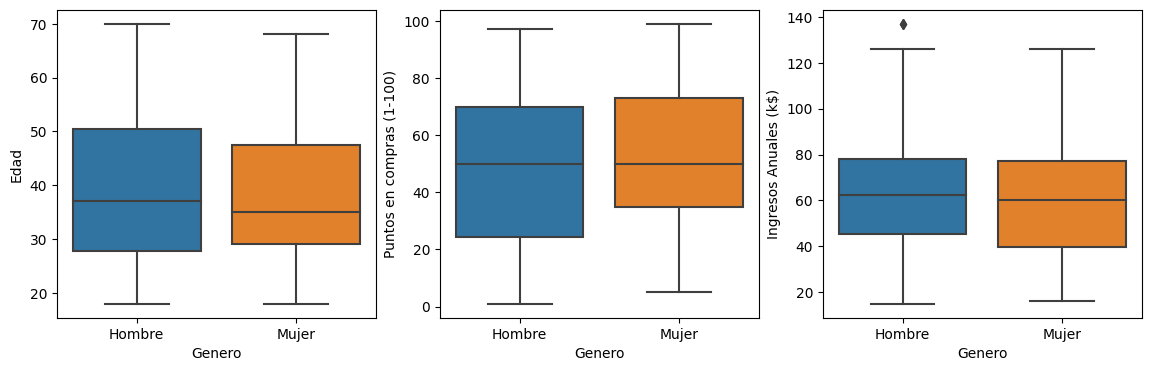

In [ ]:

fig, axs= plt.subplots(1,3, figsize = (14, 4)) #graficos en columnas y graficos en filsa
sns.boxplot(data = df, y = "Edad", x = "Genero", ax = axs[0])
sns.boxplot(data = df, y = "Puntos en compras (1-100)", x = "Genero", ax = axs[1])
sns.boxplot(data = df, y = "Ingresos Anuales (k$)", x = "Genero",ax = axs[2])

<ipython-input-39-4877423df335>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

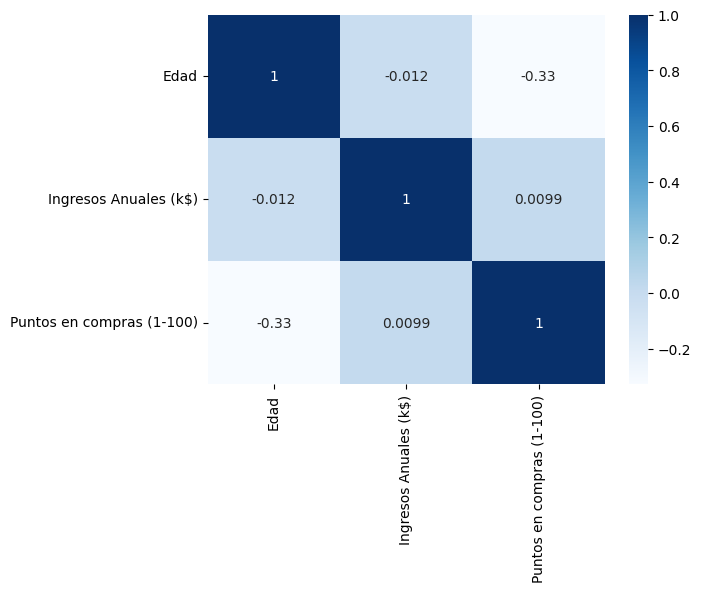

In [ ]:
corr = df.corr()
sns.heatmap(data = corr, cmap = 'Blues', annot = True)

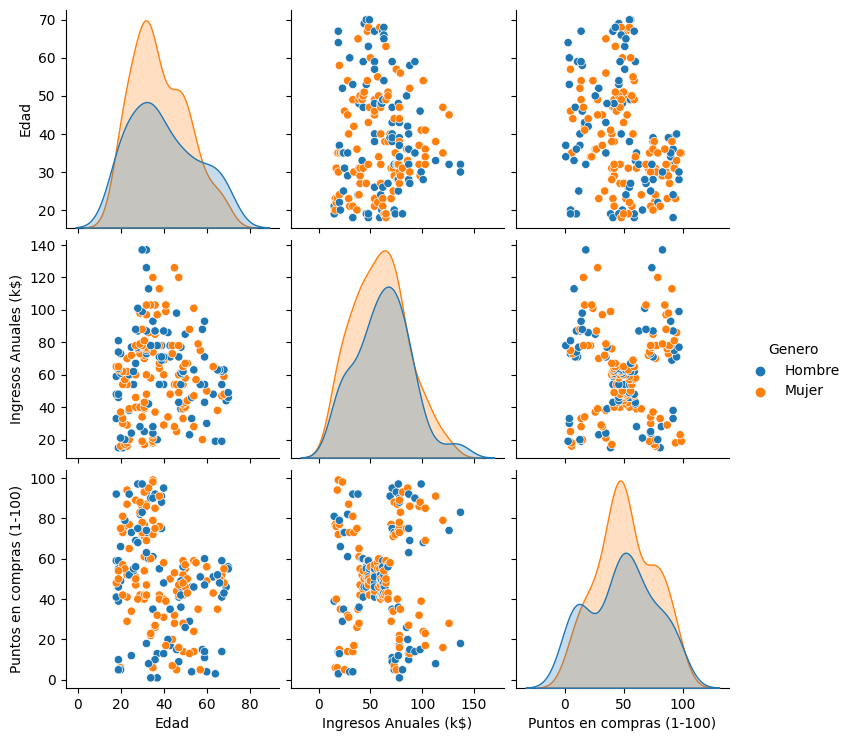

In [ ]:
sns.pairplot(data = df, hue = "Genero")

In [ ]:
columns = ["Edad", "Puntos en compras (1-100)", "Ingresos Anuales (k$)"]
#x = df.drop("Genero", axis = 1)
x = df.loc[:, columns]
scaler = StandardScaler()

x_norm = scaler.fit_transform(x)
df_norm = pd.DataFrame(x_norm, columns = columns)
print(df_norm.head())

       Edad  Puntos en compras (1-100)  Ingresos Anuales (k$)
0 -1.424569                  -0.434801              -1.738999
1 -1.281035                   1.195704              -1.738999
2 -1.352802                  -1.715913              -1.700830
3 -1.137502                   1.040418              -1.700830
4 -0.563369                  -0.395980              -1.662660


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmax = 30
grupos = range(2, kmax)
wcss = []
score = []

for k in grupos:
  model = KMeans(n_clusters = k)
  clusters = model.fit_predict(df_norm)
  wcss.append(model.inertia_)
  score.append(silhouette_score(df_norm, clusters))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Figure size 640x480 with 0 Axes>

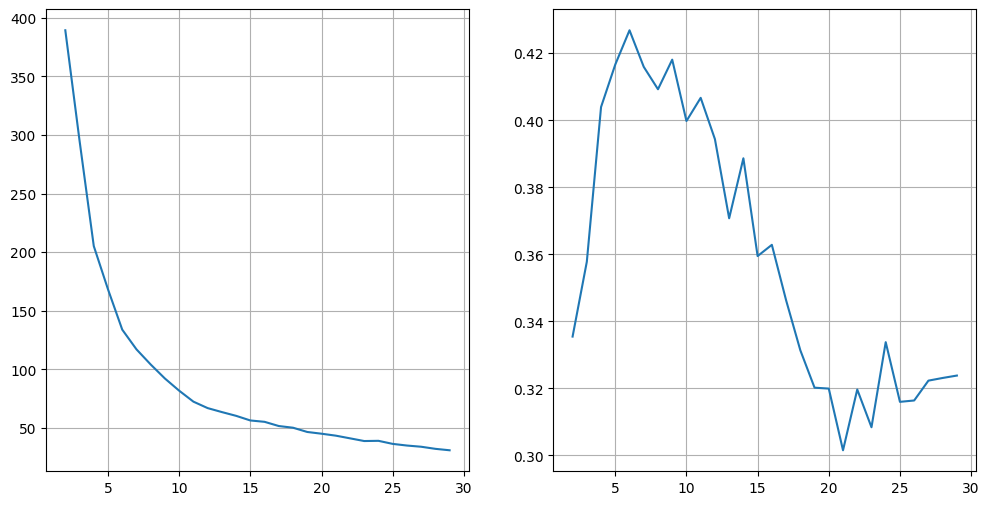

In [ ]:
plt.clf()
fig, axs = plt.subplots(1,2,figsize = (12, 6))

axs[0].plot(grupos,wcss) #el metodo del codo
axs[0].grid(True) #el metodo del codo
axs[1].plot(grupos,score) #el metodo del cod
plt.grid(True)

In [ ]:
model = KMeans(n_clusters = 6)
clusters = model.fit_predict(df_norm)

df["Grupo"] = clusters.astype("str")
print(df.head())

  Genero  Edad  Ingresos Anuales (k$)  Puntos en compras (1-100) Grupo
0      0    19                     15                         39     2
1      0    21                     15                         81     2
2      4    20                     16                          6     1
3      0    23                     16                         77     2
4      4    31                     17                         40     1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


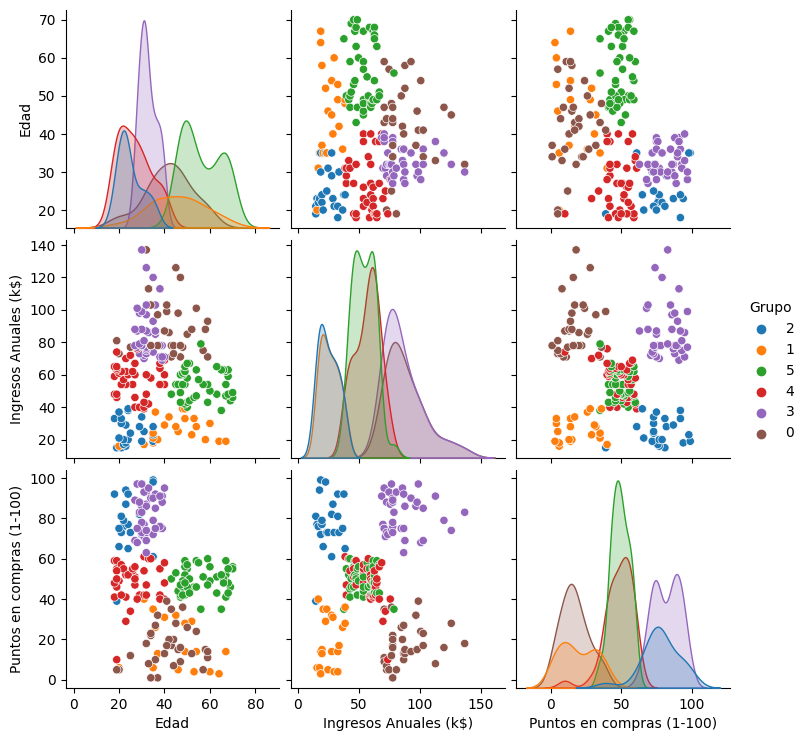

In [ ]:
sns.pairplot(data = df, hue = "Grupo")

In [ ]:
df.groupby ("Grupo").mean()

<ipython-input-82-809a703f3220>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby ("Grupo").mean()


,Edad,Ingresos Anuales (k$),Puntos en compras (1-100)
Grupo,,,
0,41.939394,88.939394,16.969697
1,45.523810,26.285714,19.380952
2,25.000000,25.260870,77.608696
3,32.692308,86.538462,82.128205
4,26.794872,57.102564,48.128205
5,56.333333,54.266667,49.066667
